# Metody analizy danych. Lab 1. Biblioteka numpy, część 1

# 1. Wstęp

Biblioteka numpy jest biblioteką dedykowaną do obliczeń numerycznych, która jest zaimplementowana głównie w języku C. Jej głównym obiektem danych jest tablica wielowymiarowa pozwalająca na pracę z wieloma typami danych, ale jednorodnych. Biblioteka ta dostarcza również wielu metod matematycznych np. z zakresu algebry liniowej, statystyki czy generatorów liczb pseudolosowych.

> Oficjalna strona z dokumentacją do wersji 2.2: https://numpy.org/doc/2.2/index.html 

## 1.1 Instalacja biblioteki numpy

In [1]:
!pip install numpy

In [6]:
np.__version__

'2.2.3'

In [2]:
import numpy as np

# 2. Tablica `numpy.ndarray`

 ## 2.1 Sposoby inicjalizacji tablicy

> Dokumentacja: https://numpy.org/doc/2.2/reference/routines.array-creation.html

In [ ]:
# wbudowana funkcja dir wyświetla nam zbiór właściwości oraz metod, które są możliwe do
# wywołania dla podanego typu obiektu - jak widań ndarray (n-dimensional array) posiada
# ich całkiem sporo, ale ten sposób ich wyświetlenie można potraktować jako ciekawostkę lub szybki sposób na przypomnienie sobie nazwy jednej z nich
# Lepszym pomysłem na początek jest oficjalna dokumentacja.
dir(np.ndarray)

In [5]:
# tablice numpy możemy inicjalizować na wiele sposobów, 
# np. rzutując (konwertując) inne popularne typy danych
lista = [1, 2, 3, 4, 5]
arr = np.array(lista)
arr, type(arr)

(array([1, 2, 3, 4, 5]), numpy.ndarray)

In [17]:
# czy możliwe jest również rzutowanie dla list wielopoziomowych (zagnieżdżonych)?
lista_zagniezdzona = [[i*j for j in range(1, 6)] for i in range(1, 6)]
display(lista_zagniezdzona) 
len(lista_zagniezdzona)

[[1, 2, 3, 4, 5],
 [2, 4, 6, 8, 10],
 [3, 6, 9, 12, 15],
 [4, 8, 12, 16, 20],
 [5, 10, 15, 20, 25]]

5

In [18]:
arr_nested = np.array(lista_zagniezdzona)
arr_nested

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [22]:
lista_zagniezdzona_asym = [[x for x in range(1, y)] for y in range(1, 6)]
lista_zagniezdzona_asym

[[], [1], [1, 2], [1, 2, 3], [1, 2, 3, 4]]

In [23]:
# tak już nie możemy!
arr_nested_asym = np.array(lista_zagniezdzona_asym)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.

In [7]:
np.array(range(10))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# biblioteka numpy posiada własną metodę adekwatną do wbudowanej funkcji range
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [79]:
# parametry określamy adekwatnie do wbudowanej funkcji range(start, stop, step)
np.arange(2, 21, 2)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

In [35]:
# macierz wypełniona jedynkami (możemy przekazać skalar jeżeli ma to być tablica jednowymiarowa lub odpowiednią krotkę dla tablic wielowymiarowych)
display(np.ones(5))
display(np.ones((5,5)))

# lub zerami
display(np.zeros(5))
display(np.zeros((3,1)))

array([1., 1., 1., 1., 1.])

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

array([0., 0., 0., 0., 0.])

array([[0.],
       [0.],
       [0.]])

In [76]:
# linspace tworzy przestrzeń wartości w przedziale (tu od 1 do 10) w określonej liczebności
np.linspace(1,10, 100)

array([ 1.        ,  1.09090909,  1.18181818,  1.27272727,  1.36363636,
        1.45454545,  1.54545455,  1.63636364,  1.72727273,  1.81818182,
        1.90909091,  2.        ,  2.09090909,  2.18181818,  2.27272727,
        2.36363636,  2.45454545,  2.54545455,  2.63636364,  2.72727273,
        2.81818182,  2.90909091,  3.        ,  3.09090909,  3.18181818,
        3.27272727,  3.36363636,  3.45454545,  3.54545455,  3.63636364,
        3.72727273,  3.81818182,  3.90909091,  4.        ,  4.09090909,
        4.18181818,  4.27272727,  4.36363636,  4.45454545,  4.54545455,
        4.63636364,  4.72727273,  4.81818182,  4.90909091,  5.        ,
        5.09090909,  5.18181818,  5.27272727,  5.36363636,  5.45454545,
        5.54545455,  5.63636364,  5.72727273,  5.81818182,  5.90909091,
        6.        ,  6.09090909,  6.18181818,  6.27272727,  6.36363636,
        6.45454545,  6.54545455,  6.63636364,  6.72727273,  6.81818182,
        6.90909091,  7.        ,  7.09090909,  7.18181818,  7.27

In [77]:
# tablice numpy można poddawać zmianom kształu m.in. poprzez metodę reshape, co w połączeniu z różnymi metodami ich inicjalizacji
# daje dodatkowe możliwości - ale tu musimy pamiętać o symetrii tablicy, do której chcemy ją przekształcić (liczba elementów musi
# w tablicy docelowej musi być równa liczbie elementów w tablicy źródłowej)
np.arange(9).reshape((3,3))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [81]:
# np.diag zwraca tablicę dwuwymiarową kwadratową o wymiarach (v x v) + abs(k) gdzie v to wartość pierwszego argumentu przekazanego w
# wywołaniu tej funkcji, który to jest obiektem iterowalnym zawierającym elementy, które zostaną umieszczone na przekątnej
# tej macierzy. Jeżeli drugi argument tej funkcji  k (opcjonalny) nie zostanie określony, lub posiada wartość 0, to elementy 
# zostaną umieszczone na głównej przekątnej, w przeciwnym wypadku elementy zostaną umieszczone na k-tej lub -k-tej przekątnej
# oddalonej od głównej przekątnej
np.diag((1,2,3,4))

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [84]:
np.diag(np.arange(5), 1)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 3, 0],
       [0, 0, 0, 0, 0, 4],
       [0, 0, 0, 0, 0, 0]])

In [85]:
np.diag(np.arange(5), -1)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 2, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 4, 0]])

In [208]:
# funkcja diag pozwala również na ekstrakcję przekątnej z istniejącej tablicy
arr = np.arange(1, 17).reshape((4,4))
print(arr)
print(np.diag(arr))
print(np.diag(arr, -1))

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[ 1  6 11 16]
[ 5 10 15]


## 2.2 Wybrane właściwości (ang. properties) tablic numpy

In [28]:
# informacje o liczbie elementów, liczbie wymiarów oraz o wielkościach każdego wymiaru
arr.size, arr.ndim, arr.shape

(5, 1, (5,))

In [38]:
# shape dla macierzy najpierw informuje nas o liczbie wierszy, a następnie o liczbie kolumn
arr = np.zeros((4,3))
display(arr)
arr.shape

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

(4, 3)

In [43]:
# odczytywanie zawartości tablic dla wymiarów 2+ jest już nieco trudniejsze
arr = np.ones((3,3,3))
arr

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [15]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.1-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.56.0-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.1.0-cp313-cp313-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.1-py3-none-any.whl (107 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]]])

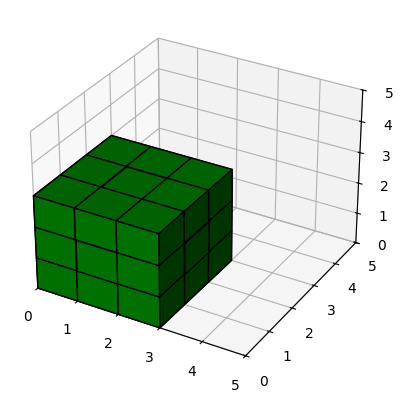

In [23]:
# przykład zaczerpnięty z: https://matplotlib.org/stable/gallery/mplot3d/voxels.html#sphx-glr-gallery-mplot3d-voxels-py

import matplotlib.pyplot as plt

# inicjalizacja tablicy 3 x 3 x 3
x = np.ones((3, 3, 3))

# po prawej stosujemy filtrowanie tablicy x warunkiem < 3, co powoduje zwrócenie
# tablicy o tych samych wymiarach, gdzie wartość spelniająca warunek zostanie
# zapisana jako wartość logiczna True, a jeżeli go nie spełnia - jako False
# chociaż można tej konwersji dokonać na kilka sposobów
cube1 = (x < 2)

# sprawdzamy co jest teraz w środku tej tablicy
display(cube1)

colors = np.empty(cube1.shape, dtype=object)
colors[cube1] = 'green'

ax = plt.figure().add_subplot(projection='3d')
ax.axes.set_xlim3d(left=0, right=5) 
ax.axes.set_ylim3d(bottom=0, top=5) 
ax.axes.set_zlim3d(bottom=0, top=5) 
ax.voxels(cube1, facecolors=colors, edgecolor='k')

plt.show()

In [75]:
# typ danych tablicy (przypominam - są jednorodne)
arr.dtype

dtype('float64')

In [128]:
# Numpy oferuje wiele typów danych, które mogą być określone jako pojemnik informacji w tablicach numpy.
# Te typy nie pokrywają się 1:1 z typami, które znamy ze standardowej biblioteki Pythona, gdyż wciąż "pod spodem"
# mamy implementację w języku C.
# Zaprezentuję tutaj kilka przykładów, ale liczba wszystkich dostępnych typów jest rozbudowana, więc
# odsyłam do dokumentacji dla pełnej referencji.

# Jak zapewne już zostało to zauważone, typ danyc jest nadawany dla tablicy automatycznie jeżeli nie określimy go w 
# trakcie jej inicjalizacji. Nie zawsze będzie się to jednak odbywało optymalnie jeżeli chodzi o utylizację pamięci dla
# danych w tej tablicy.

def print_details(np_arr):
    print(np_arr, np_arr.dtype, np_arr.itemsize, np_arr.nbytes)

# Możemy określić typ na etapie tworzenia tablicy.
arr_int = np.arange(1, 11, dtype='i') # zazwyczaj int32 lub int64
arr_int2 = np.arange(1, 11, dtype='i4') # lub np.int32
arr_int3 = np.arange(1, 11, dtype='i1') # lub np.int8
arr_int4 = np.arange(1, 11, dtype='i2') # lub np.int16
arr_int5 = np.arange(1, 11, dtype='i8') # lub np.int64

print_details(arr_int)
print_details(arr_int2)
print_details(arr_int3)
print_details(arr_int4)
print_details(arr_int5)

[ 1  2  3  4  5  6  7  8  9 10] int32 4 40
[ 1  2  3  4  5  6  7  8  9 10] int32 4 40
[ 1  2  3  4  5  6  7  8  9 10] int8 1 10
[ 1  2  3  4  5  6  7  8  9 10] int16 2 20
[ 1  2  3  4  5  6  7  8  9 10] int64 8 80


In [130]:
# każdy z tych typów posiada również odpowiednik bez znaku - to znaczy, że w przeciwieństwie do przykładów w poprzednim listingu
# liczby całkowite są przechowywane bez znaku, co podwaja zakres wartości dziesiętnych, które można przypisać do takiej zmiennej

arr_uint1 = np.arange(1, 11, dtype='u4') # lub np.int32
arr_uint2 = np.arange(1, 11, dtype='u8') # lub np.int64

print_details(arr_uint1)
print_details(arr_uint2)

[ 1  2  3  4  5  6  7  8  9 10] uint32 4 40
[ 1  2  3  4  5  6  7  8  9 10] uint64 8 80


In [131]:
# typy zmiennoprzecinkowe
# float - f8 - 8 bajtów (to samo co float64)
# float16 - f2 - 2 bajty
# float32 - f - 4 bajty
# float64 - d - 8 bajtów

arr_1 = np.arange(1, 11, dtype='float16')
arr_2 = np.arange(1, 11, dtype='float32')
arr_3 = np.arange(1, 11, dtype='float64')

print_details(arr_1)
print_details(arr_2)
print_details(arr_3)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] float16 2 20
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] float32 4 40
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] float64 8 80


In [134]:
# inne typy danych

# bool
bool_arr = np.arange(1, 11, dtype='b')
# łańcuch znaków - unicode
unknown_arr = np.array(['Ala', 'ma', 'kota'])
unknown_arr2 = np.array(list('Zgadnij'))


print_details(bool_arr)
print_details(unknown_arr)
print_details(unknown_arr2)

[ 1  2  3  4  5  6  7  8  9 10] int8 1 10
['Ala' 'ma' 'kota'] <U4 16 48
['Z' 'g' 'a' 'd' 'n' 'i' 'j'] <U1 4 28


## 2.3 Wybrane operacje na tablicach numpy

### 2.3.1 Zmiana typu danych tablicy

In [139]:
# konwersja typu danych w tablicy jest możliwa
arr =  np.arange(100_000, 8_000_000, 100_000)
print(arr)
print(arr.dtype)
print(arr.astype(np.uint32))
print(arr.astype(np.uint16))
print(arr.astype(np.uint8))

[ 100000  200000  300000  400000  500000  600000  700000  800000  900000
 1000000 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000
 1900000 2000000 2100000 2200000 2300000 2400000 2500000 2600000 2700000
 2800000 2900000 3000000 3100000 3200000 3300000 3400000 3500000 3600000
 3700000 3800000 3900000 4000000 4100000 4200000 4300000 4400000 4500000
 4600000 4700000 4800000 4900000 5000000 5100000 5200000 5300000 5400000
 5500000 5600000 5700000 5800000 5900000 6000000 6100000 6200000 6300000
 6400000 6500000 6600000 6700000 6800000 6900000 7000000 7100000 7200000
 7300000 7400000 7500000 7600000 7700000 7800000 7900000]
int64
[ 100000  200000  300000  400000  500000  600000  700000  800000  900000
 1000000 1100000 1200000 1300000 1400000 1500000 1600000 1700000 1800000
 1900000 2000000 2100000 2200000 2300000 2400000 2500000 2600000 2700000
 2800000 2900000 3000000 3100000 3200000 3300000 3400000 3500000 3600000
 3700000 3800000 3900000 4000000 4100000 4200000 4300000 440

In [174]:
# Czy wiemy co tu się stało?
# Spróbujmy to wyjaśnić. Weźmiemy po uwagę 5 pierwszych wartości z tablicy
vals = list(arr[:5])

for val in vals:
    print(f'Oryginalna: {val}, binarnie: {bin(val)},\
    bin 16: {bin(val)[:-17:-1][::-1]} , dziesiętnie {int(bin(val)[:-17:-1][::-1], base=2)}\
    bin 8: {bin(val)[:-9:-1][::-1]} , dziesiętnie {int(bin(val)[:-9:-1][::-1], base=2)}')

Oryginalna: 100000, binarnie: 0b11000011010100000,    bin 16: 1000011010100000 , dziesiętnie 34464    bin 8: 10100000 , dziesiętnie 160
Oryginalna: 200000, binarnie: 0b110000110101000000,    bin 16: 0000110101000000 , dziesiętnie 3392    bin 8: 01000000 , dziesiętnie 64
Oryginalna: 300000, binarnie: 0b1001001001111100000,    bin 16: 1001001111100000 , dziesiętnie 37856    bin 8: 11100000 , dziesiętnie 224
Oryginalna: 400000, binarnie: 0b1100001101010000000,    bin 16: 0001101010000000 , dziesiętnie 6784    bin 8: 10000000 , dziesiętnie 128
Oryginalna: 500000, binarnie: 0b1111010000100100000,    bin 16: 1010000100100000 , dziesiętnie 41248    bin 8: 00100000 , dziesiętnie 32


> UWAGA! Konwersja danych może zakończyć się stratą precyzji! Należy najpier przeprowadzić analizę danych, które chcemy poddać konwersji.

### 2.3.2 Czym jest i jak działa broadcasting

In [184]:
# wykonanie obliczeń na każdym elemencie listy - dla przypomnienia
lista = list(range(1, 11))
print(lista)

for idx in range(len(lista)):
    lista[idx] = lista[idx] * 2

print(lista)

# albo bardziej pythonicznie

lista = [elem * 2 for elem in lista]
print(lista)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[4, 8, 12, 16, 20, 24, 28, 32, 36, 40]


In [182]:
# w przypadku numpy sytuacja ma się inaczej

arr = np.arange(1,11)
print(arr)
print(arr * 2) # operacja jest wykonywana element-wise czyli na każdym elemencie tablicy

[ 1  2  3  4  5  6  7  8  9 10]
[ 2  4  6  8 10 12 14 16 18 20]


In [185]:
# również większość funkcji biblioteki numpy akceptuje tablicę jako argument wejściowy
# tu poniżej, wyliczymy pierwiastek z każdej wartości tablicy
np.sqrt(arr)

array([1.        , 1.41421356, 1.73205081, 2.        , 2.23606798,
       2.44948974, 2.64575131, 2.82842712, 3.        , 3.16227766])

### 2.3.3 Indeksowanie i wycinanie

In [188]:
# mechanizm dostępu do tablic numpy jest analogiczny do tego znanego z obiektów iterowalnych natywnego Pythona
arr = np.arange(1, 11)
print(arr[0])

print(arr[-1])

print(arr[:5])

1
10
[1 2 3 4 5]


In [197]:
# sytuacja wygląda nieco inaczej w przypadku tablic wielowymiarowych

arr = np.arange(1, 17).reshape((4,4))
print(arr)

# podajemy parametry dla każdego wymiaru
print(arr[0,0])
print(arr[:,0]) # pierwsza kolumna
print(arr[0,:]) # pierwszy wiersz
print(arr[0:2,0:2]) # tablica 2 wymiarowa

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
1
[ 1  5  9 13]
[1 2 3 4]
[[1 2]
 [5 6]]


In [204]:
# do wycinków tablic możemy również przypisać wartości

arr[:,0] = 0
arr

array([[ 0,  2,  3,  4],
       [ 0,  6,  7,  8],
       [ 0, 10, 11, 12],
       [ 0, 14, 15, 16]])

In [218]:
# Jeżeli przywołamy teraz przykład tablicy, która została następnie wyświetlona na wykresie
# to mieliśmy tam do czynienia z tablicą boolowaską, która nazywan jest również mapą boolowską.
# Nazwa ta nawiązuje do operacji, które dzięki takim tablicom można wykonać na innych tablicach.
# Taka mapa pozwala na wycinanie, przypisywanie lub wykonanie funkcji dla każdej wartości tablicy,
# do której taką mapę "przyłożymy" tzn. że mapa spowoduje wykonanie operacji dla każdej wartości
# logicznej True z mapy i pominie operację dla każdej wartości False. Poniżej przykłady.
arr = np.arange(1, 17).reshape((4,4))
print(arr)

# prosty warunek - zwraca mapę, króta ma takie same wymiary i wszędzie tam gdzie warunek jest spełniony przyjmuje wartość True
print((arr < 10))

# jeżeli teraz przyłożymy taką mapę do oryginalnej tablicy...
print(arr[(arr < 10)])
# to otrzymamy na wyjściu tylko wartości gdzie w mapie jest True, ale wymiar już nie zostanie zachowany

# istnieją jeszcze inne sposoby, ale zostaną zaprezentowane na kolejnych zajęciach

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[ True  True  True  True]
 [ True  True  True  True]
 [ True False False False]
 [False False False False]]
[1 2 3 4 5 6 7 8 9]


## 2.4 Porównanie wydajności

Wiemy już, że poznanie bibblioteki numpy jest potrzebne aby sprawnie pracować następnie z biblioteką pandas, która jest niezwykle popularna w kontekście analizy danych. Ważnym aspektem jest również prędkość przetwarzania, którą oferuje numpy, zwłaszcza w kontekście porównania ze standardową biblioteką Pythona i adekwatnymi obliczeniami. 

Poniżej zaprezentowano kilka przykładów porównania wydajności różnych fragmentów kodu Pythona z wykorzystaniem biblioteki timeit.

In [187]:
from timeit import timeit


setup= """
import numpy as np
"""

setup_2 = """
from array import array
"""

stmt1 = """list(range(1, 100001))"""
stmt2 = """np.arange(1, 100001)"""
stmt3 = """array('I', range(1, 100001))"""

timeit(stmt=stmt1, number=1000), timeit(stmt=stmt2, setup=setup, number=1000), timeit(stmt=stmt3, setup=setup_2, number=1000)

(2.0964688999811187, 0.03895099996589124, 2.732762699946761)

Widać powyżej jaka jest różnica w prędkości pomiędzy standardowymi listami a tablicą numpy w tym konkretnym przypadku, w którym tworzymy tablicę 100000 wartości typu int. Całość powtórzona jest 1000 razy dla uśrednienia warunków.

## Zadania

## Zadania

**Zadanie 1**  
Stwórz i wyświetl tablicę składającą się z 10 kolejnych wartości całkowitych w przedziale [1,10].

**Zadanie 2**   
Zmień typ wartości w tablicy z zadania 1 na float32. Wyświetl tę tablicę.

**Zadanie 3**  
Stwórz tablicę zawierającą kolejne potęgi liczby 2 dla wykładników od 2 do 16.

**Zadanie 4**  
Utwórz tablicę numpy o wymiarach 5x5 z kolejnymi wartościami całkowitoliczbowymi od 1 do 25 i następnie wyświetl:
* ostatnią wartość z tablicy (jest to wartość znajdująca się na ostatnich indeksach wiersza i kolumny)
* drugą kolumnę,
* trzeci wiesz,
* główną przekątną,
* tablicę, która zawiera wartości 9,10,14 oraz 15 (tablica ma kształt 2 x 2)

**Zadanie 5**  
Bazując na przykładach powyżej oraz wykresie z punktu 2.2 wyświetl tę samą tablicę (3 x 3) w poniższych postaciach:
* widoczne są tylko elementy dla współrzędnych y = 1 (x to oś pozioma, y to oś pionowa, z to "głębia")
* widoczne są wartości dla z = 1 oraz z = 3 i wszystkich wartości x oraz y (to tak jakby dwie kolumny tej kostki 3 x 3 x 3 - pierwsza i ostatnia).

**Zadanie 6**  
Bazując na przykładzie z podpunktu 2.3.2 przygotuj test czasu wykonania dla trzech poniższych przypadków:
* inicjalizacja listy 10000 wartości całkowitoliczbowych oraz przemnożenie każdego elementu przez liczbę 2 wykorzystując zapis z pętlą for
* tak jak powyżej, ale z wykorzystaniem list comprehension (dla przypomnienia [wyrażenie for elem in kolekcja])
* dla tablicy numpy